# # Chapter 2 Multi-armed Bandits

### Important Points
* True value of the action is the mean reward when the action is taken overtime
* True value can be found using the expectation formula
* For k-armed bandit problem, each K actions has an expected/mean reward := Value of the action ($q_*(a)$)
* $q_*(a) =  E [R_t|A_t=a]$, is the value but in most of the cases we don't know this value
* So we use Action-Value methods <- Esitmates the value of the action and use it to take decision.
* $Q_t(a)=\frac{\sum_{i=1}^{t-1} R_i \cdot 1_{A_i=a}}{\sum_{i=1}^{t-1}1_{A_i=a}}$
* Alternatively, $Q_{n+1} = \frac{\sum_{i=1}^{n} R_i}{n}$
* Now based on the $Q_t(a)$ at time step t, we can choose the best action as $A_t =  argmax_a Q_t(a)$
* We can expand the alternative defination of expected value as $Q_{n+1} = Q_n + \frac{R_n-Q_n}{n}$
* In general form, newEstimate <- oldEstimate + stepSize [Target - oldEstimate]


### Simple Bandit Algorithm Pseudocode
* For all actions, initialize $Q(a)\leftarrow 0, N(a)\leftarrow 0$ where N(a) is the number of times the action a has been selected
* While True:
    + $A \leftarrow argmax_a Q(a)$ with probability 1-$\epsilon$ or a random action with probability $\epsilon$
    + $R \leftarrow bandit(A)$ // Reward signal from the environment/bandit
    + $N(A)\leftarrow N(A) + 1$
    + $Q(A)\leftarrow Q(A) + \frac{R - Q(A)}{N(A)}$

In [1]:
# Simple bandit algorithm for k = 10 based on the Pseudo code above
# Import statement
%matplotlib inline

import numpy as np

# Define the random state for consistent results
random = np.random.RandomState(123)

# Bandit class which a normal distribution
class Bandit:
    # Initialize
    def __init__(self, id):
        self.id = id
        # self.sd = random.randint(1,5,1)[0]
        self.sd = random.choice([1, 5, 10, 20])
        self.mean = random.choice([1, 5, 10, 20])
    
    # For printing the object
    #def __repr__(self):
    #    print (self.mean)
    #    print (self.sd)
    
    # Generate reward for playing this bandit    
    def step(self):
        return random.normal(self.mean, self.sd, 1)[0]



# Define k
k = 10

# Initialize numpy array of Q and N
q_a = np.zeros(k)
n_a = np.zeros(k)

# Define epsilon
epsilon = 0.01

# Construct k bandits
bandits = []
for i in range(k):
    bandits.append(Bandit(i))

# Main loop    
for step in range(2000):
    # Explotitation
    if random.rand() < (1 - epsilon):
        indx = np.argmax(q_a)
        
        # Check if there are multiple max values
        results = q_a[:]==q_a[indx]
        
        # If there are multiple max values choose the max arg at random
        if np.sum(results*1)>1:
            action = random.choice(np.argwhere(results==True).flatten())
        else:
            action = indx
    
    # Exploration
    else:
        # Make the action choice at random
        action = random.choice(range(0,k))
    
    # Get the reward from bandit for playing that action
    reward = bandits[action].step()
    
    # Increment the N_A array for taking that action
    n_a[action] += 1
    
    # Update the Q_A / estimate in incremental fashion
    # newEstimate <- oldEstimate + stepSize * [Target - oldEstimate]
    q_a[action] = q_a[action] + (reward - q_a[action])/n_a[action]
        
# Print the value of the array to see if everything looks good        
print ('Mean Value Estimate', q_a)
print ('Action count', n_a)
print ([(bandit.mean,bandit.sd) for bandit in bandits])


Mean Value Estimate [ 3.31432096 12.11662729  9.85018956 17.07896357  6.75562677  0.
  0.          4.85355053 19.94358169 -3.13060835]
Action count [   2.    8.    4.    2.    8.    0.    0.  107. 1866.    3.]
[(5, 10), (10, 10), (10, 1), (5, 10), (10, 20), (5, 20), (5, 10), (5, 1), (20, 10), (1, 5)]


### A simple bandit result discussion
The simple bandit algorithm did the correct choice by choosing the banding with mean 20 and standard deviation of 10 because it can gain the highest reward by playing this bandit. Furthermore, the mean value estimates shows the value estimate of 19.94 which is almost equal to the real mean value of 20. Thus, simple value exploitation did pretty good on this k-arm bandit task.

### Notes
* The simple bandit algorithm based on Average Value is suitable for stationary bandits i.e where the rewards probability density function don't change.
* One of the popular ways to handle non-stationary bandits is to introduce constant step size instead of 1/n. 
* Using this constant in the formula, gives us a weighted average formula, $Q_{n+1}= (1-\alpha)^n Q_1 + \sum_{i=1}^{n}\alpha (1-\alpha)^{n-i}R_i$
* This formula is sometimes also called exponential recency-weighted average
* The cool thing is that the sum of the weights equals to 1 and the weight given to reward R_i depends on how many reswards ago n-1 was seen. 
* We can choose different values of step size. When step size = 1/n then its the sample-average method and it is guaranteed to converge. But not all the values of step size will converge. So the choice of step size is important. 
* The conditions for the convergence are $\sum_{n=1}^{\infty} \alpha_n(a) = \infty$ and $\sum_{n=1}^{\infty} \alpha_n^2(a) < \infty$
* The first conditions says that the steps are large enough to overcome random fluctions and the second condition ensures that the step are small enough to assure convergence.

### Exercise 2.4
If the step-size parameters are not constant, then the estimate Q_n is will a bit bit different than the equation we saw before. Instead of using the same alpha every time, we need to use the value of alpha from the alpha list in each time step.

### Exercise 2.5
Experiment for various sample-average methods for non-stationary problems

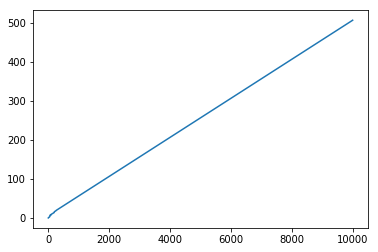

Mean Value Estimate [  53.40760137   40.03305054   62.92512607   48.98140916   50.30017832
   25.61019974   49.1277202  4580.40930063   75.52259888   73.06814855]
Action count [ 115.   84.   92.   87.   92.   85.   83. 9149.  105.  108.]
[(5, 10), (5, 10), (10, 20), (5, 1), (20, 10), (5, 20), (10, 20), (5, 1), (20, 20), (20, 1)]


In [5]:
# Simple bandit algorithm for k = 10 based on the Pseudo code above
# Import statement
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Define the random state for consistent results
random = np.random.RandomState(123)

# Define no.of trails
trails = 10000

# Bandit class which a normal distribution
class Bandit:
    # Initialize
    def __init__(self, id):
        self.id = id
        # self.sd = random.randint(1,5,1)[0]
        self.sd = random.choice([1, 5, 10, 20])
        self.mean = random.choice([1, 5, 10, 20])
        self.reward = random.normal(self.mean, self.sd, 1)[0]
    
    # For printing the object
    #def __repr__(self):
    #    print (self.mean)
    #    print (self.sd)
    
    # Generate reward for playing this bandit    
    def step(self):
        # As the exercise suggest, we need to add a noise of mean 1 and sd 0.01
        noise = random.normal(1, 0.01, 1)[0]
        self.reward += noise
        return self.reward


# Define k
k = 10

# Initialize numpy array of Q and N
q_a = np.zeros(k)
n_a = np.zeros(k)

# Define epsilon
epsilon = 0.1

# Define alpha/step size
alpha = 0.1

# Define which method to use for update
method = 'I' # Options: I <- incremental, C <- constant step size

# Construct k bandits
bandits = []
for i in range(k):
    bandits.append(Bandit(i))

# Make a list to store the rewards for 8th arm
reward_store = []
# Main loop    
for step in range(trails):
    # Explotitation
    if random.rand() < (1 - epsilon):
        indx = np.argmax(q_a)
        
        # Check if there are multiple max values
        results = q_a[:]==q_a[indx]
        
        # If there are multiple max values choose the max arg at random
        if np.sum(results*1)>1:
            action = random.choice(np.argwhere(results==True).flatten())
        else:
            action = indx
    
    # Exploration
    else:
        # Make the action choice at random
        action = random.choice(range(0,k))
    
    # Get the reward from bandit for playing that action
    reward = bandits[action].step()
    
    # Increment the N_A array for taking that action
    n_a[action] += 1
    
    # Update the Q_A / estimate in incremental fashion
    # newEstimate <- oldEstimate + stepSize * [Target - oldEstimate]
    if method == 'I':
        q_a[action] = q_a[action] + (reward - q_a[action])/n_a[action]
    elif method == 'C':
        # Update using constant step-size
        q_a[action] = q_a[action] + (reward - q_a[action]) * alpha
    else:
        # No method selected. So no updated
        pass
    
    reward_store.append(np.mean(q_a))
    
reward_store = np.array(reward_store)
plt.plot(list(range(trails)), reward_store)
plt.show()
# Print the value of the array to see if everything looks good        
print ('Mean Value Estimate', q_a)
print ('Action count', n_a)
print ([(bandit.mean,bandit.sd) for bandit in bandits])


### Notes
* As we have noticed, we need to have an initial estimate of Q_a. For above examples we set it to zero but sometimes it can be used to inject the knowledge the human already have about the system
* Also the book gives a awesome example of the use of initial Q_a values to explore more. At first, Q_a is set to 5. But the mean reward is 1 so the algoritm is forced to explore quite a bit before converging to the mean value. Thus the choice of initial values can be used for some tricks and optimisim. 

### Exercise 2.6
At start there are lots of spikes as the resward is set to 5, so the greedy method tries to exploit but next times ends up exploring. This method performs better as all the k bandits are at least choosen once. In normal case, if one of the bandits are never explored, the performance suffers. So this method is better than simple method due to extensive exploration

### Exercise 2.7
Mathametical analysis done in paper.

### Notes
* Exploration is need so as to check if there are actions which are leftout but could be optimal. Using greedy approach we don't do exploration. With epsilon greedy we do somekind of exploration but still we focus on exploitation. It would be good if we could explore and rank the explored options based on their potential. 
* Such a method is upper-confidence-bound action selection and its given by $A_t = argmax_a \big[ Q_t(a) + c  \sqrt\frac{\ln t}{N_t(a)} \big]$
* Upper Confidence Bound (UCB) is that the second term (square root) is the representation of uncertainty. As we use the action a, the denominator N_t(a) increases, thus reducing the uncertainy in the estimate.

### Exercise 2.8